In [22]:
from deep_neural_network_model import DNN
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, model_selection, preprocessing
from tensorflow.keras.datasets import mnist

# IRIS Dataset test

In [23]:
iris = datasets.load_iris()

X = np.array(iris.data[:100])
Y = np.array(iris.target[:100])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test = X_test.T
Y_test = Y_test.reshape(1,len(Y_test))

In [24]:
print(X_train.shape)
print(X_test.shape)

(4, 80)
(4, 20)


In [25]:
model = DNN()
model.train(X_train=X_train, Y_train=Y_train, layer_dims=[5,4,1])

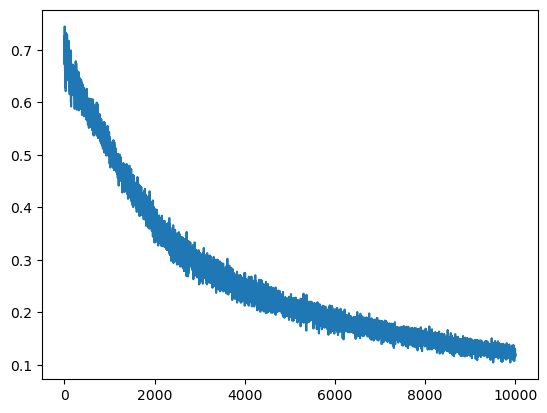

In [26]:
plt.plot(model.cost_during_training)

In [27]:
preds = model.predict(X_test)
pred_labels = preds > 0.5
test_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(test_accuracy)

1.0


Model predicts perfectly on iris test dataset

# Breast Cancer Data

In [28]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [29]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data For Better Training and also for avoiding Zero Division Errors in the beggining of learning
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(30, 455) and (1, 455)
(30, 114) and (1, 114)


In [30]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[50, 40, 30, 10, 1], epoch=10_000)

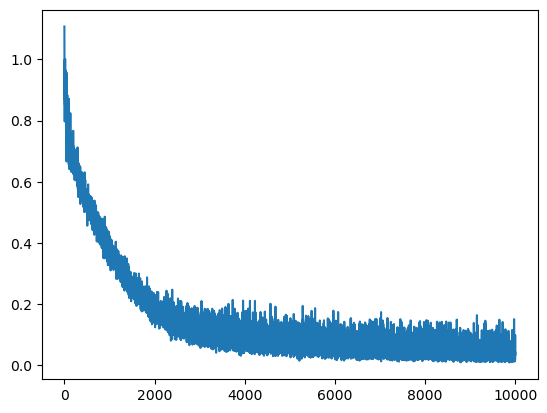

In [31]:
plt.plot(model.cost_during_training)

In [32]:
preds = model.predict(X_test_std)
pred_labels = preds > 0.5
train_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(train_accuracy)

0.9473684210526315


Our network also performs well on Breast Cancer Test Dataset

# CIFAR-10 Dataset Test

In [33]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

indices_0_1_train = np.where((Y_train == 0) | (Y_train == 1))
indices_0_1_test = np.where((Y_test == 0) | (Y_test == 1))

X_train = X_train[indices_0_1_train]
Y_train = Y_train[indices_0_1_train]

X_test = X_test[indices_0_1_test]
Y_test = Y_test[indices_0_1_test]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize Pixel values
X_train_std = X_train / 255.0
X_test_std  = X_test / 255.0

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(784, 12665) and (1, 12665)
(784, 2115) and (1, 2115)


In [37]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[785, 500, 100, 10, 1], epoch=1_000)

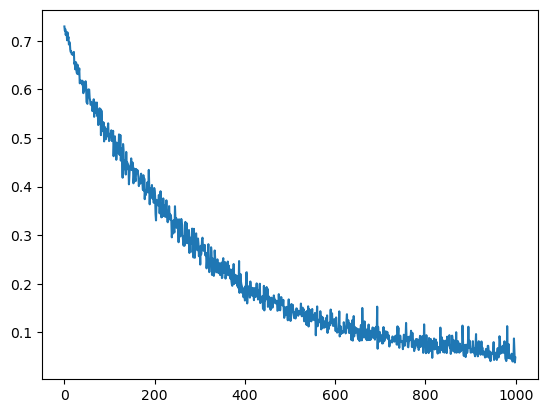

In [38]:
plt.plot(model.cost_during_training)

In [39]:
preds = model.predict(X_test_std)
pred_labels = preds > 0.5
test_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(f"Label 1 Ratio: {np.sum(Y_test) / Y_test.shape[1]}")
print(test_accuracy)

Label 1 Ratio: 0.5366430260047281
0.9990543735224586


The model also works well on image datasets